In [52]:
# loading packages
import numpy as np
import pandas as pd
from pandas import datetime

# data visualization and missing values
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs

%matplotlib inline

# stats
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.metrics import mean_squared_error, r2_score

# machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
seed = 123

# importing data ( ? = missing values)
data = pd.read_csv("Auto-Data.csv", na_values = '?')
data.columns

C:\Users\daven\AppData\Local\Temp/ipykernel_472/2710056547.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


Index(['Unnamed: 0', 'symboling', 'normalized.losses', 'make', 'fuel.type',
       'aspiration', 'num.of.doors', 'body.style', 'drive.wheels',
       'engine.location', 'wheel.base', 'length', 'width', 'height',
       'curb.weight', 'engine.type', 'num.of.cylinders', 'engine.size',
       'fuel.system', 'bore', 'stroke', 'compression.ratio', 'horsepower',
       'peak.rpm', 'city.mpg', 'highway.mpg', 'price'],
      dtype='object')

In [54]:
# first glance at the data itself
print("In total: ",data.shape)
data.head(5).append(data.tail(5))

In total:  (205, 27)


,Unnamed: 0,symboling,normalized.losses,make,fuel.type,aspiration,num.of.doors,body.style,drive.wheels,engine.location,...,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,price
0,1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,2,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,3,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,4,2,164.0,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,5,2,164.0,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
200,201,-1,95.0,volvo,gas,std,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,202,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,203,-1,95.0,volvo,gas,std,four,sedan,rwd,front,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,204,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0
204,205,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,19,25,22625.0


In [55]:
# replacing
data = data.dropna(subset = ['price', 'bore', 'stroke', 'peak.rpm', 'horsepower', 'num.of.doors'])
data['normalized.losses'] = data.groupby('symboling')['normalized.losses'].transform(lambda x: x.fillna(x.mean()))

print('In total:', data.shape)
data.head()

In total: (193, 27)


,Unnamed: 0,symboling,normalized.losses,make,fuel.type,aspiration,num.of.doors,body.style,drive.wheels,engine.location,...,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,price
0,1,3,174.384615,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,2,3,174.384615,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,3,1,128.152174,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,4,2,164.000000,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,5,2,164.000000,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [56]:
data.describe()

,Unnamed: 0,symboling,normalized.losses,wheel.base,length,width,height,curb.weight,engine.size,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,price
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,105.176166,0.797927,123.133090,98.923834,174.326425,65.893782,53.869948,2561.507772,128.124352,3.330622,3.248860,10.143627,103.481865,5099.740933,25.326425,30.787565,13285.025907
std,59.684414,1.235582,34.773860,6.152409,12.478593,2.137795,2.394770,526.700026,41.590452,0.272385,0.315421,3.977491,37.960107,468.694369,6.387828,6.816910,8089.082886
min,1.000000,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,53.000000,0.000000,95.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.000000,25.000000,7738.000000
50%,106.000000,1.000000,113.166667,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000
75%,157.000000,2.000000,150.000000,102.400000,184.600000,66.900000,55.700000,2952.000000,146.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16515.000000
max,205.000000,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


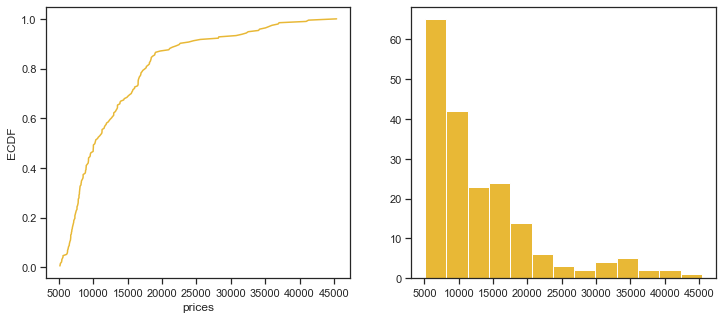

In [57]:
plt.figure(figsize = (12, 5)) 
c2 = '#E8B836'

# ECDF
plt.subplot(121)
cdf = ECDF(data['price'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c2);
plt.xlabel('prices'); plt.ylabel('ECDF');

# overall distribution
plt.subplot(122)
plt.hist(data['price'], 
         bins = int(np.sqrt(len(data['price']))),
         color = c2);

In [58]:
def mosthighlycorrelated(mydataframe, numtoreport):
    # find the correlations
    cormatrix = mydataframe.corr()
    # set the correlations on the diagonal or lower triangle to zero,
    # so they will not be reported as the highest ones:
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
    # find the top n correlations
    cormatrix = cormatrix.stack()
    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
    # assign human-friendly names
    cormatrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]
    return cormatrix.head(numtoreport)

mosthighlycorrelated(data, 10)

,FirstVariable,SecondVariable,Correlation
0,city.mpg,highway.mpg,0.971975
1,engine.size,price,0.888778
2,length,curb.weight,0.882694
3,wheel.base,length,0.879307
4,width,curb.weight,0.867640
5,length,width,0.857368
6,curb.weight,engine.size,0.857188
7,engine.size,horsepower,0.845325
8,curb.weight,price,0.835368
9,horsepower,city.mpg,-0.833615


In [59]:
data['volume'] = data.length * data.width * data.height

data.drop(['width', 'length', 'height', 'engine.size',
           'curb.weight', 'city.mpg'], 
          axis = 1, # 1 for columns
          inplace = True) 

In [60]:
data.columns


Index(['Unnamed: 0', 'symboling', 'normalized.losses', 'make', 'fuel.type',
       'aspiration', 'num.of.doors', 'body.style', 'drive.wheels',
       'engine.location', 'wheel.base', 'engine.type', 'num.of.cylinders',
       'fuel.system', 'bore', 'stroke', 'compression.ratio', 'horsepower',
       'peak.rpm', 'highway.mpg', 'price', 'volume'],
      dtype='object')

C:\Users\daven\AppData\Local\Temp/ipykernel_472/2462080946.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_all, dtype = np.bool)


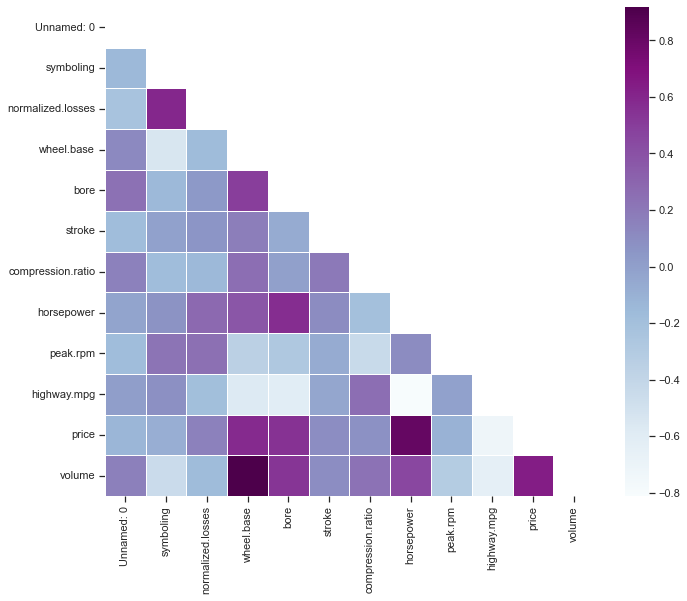

In [61]:
# Compute the correlation matrix 
corr_all = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_all, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_all, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "BuPu")      
plt.show()

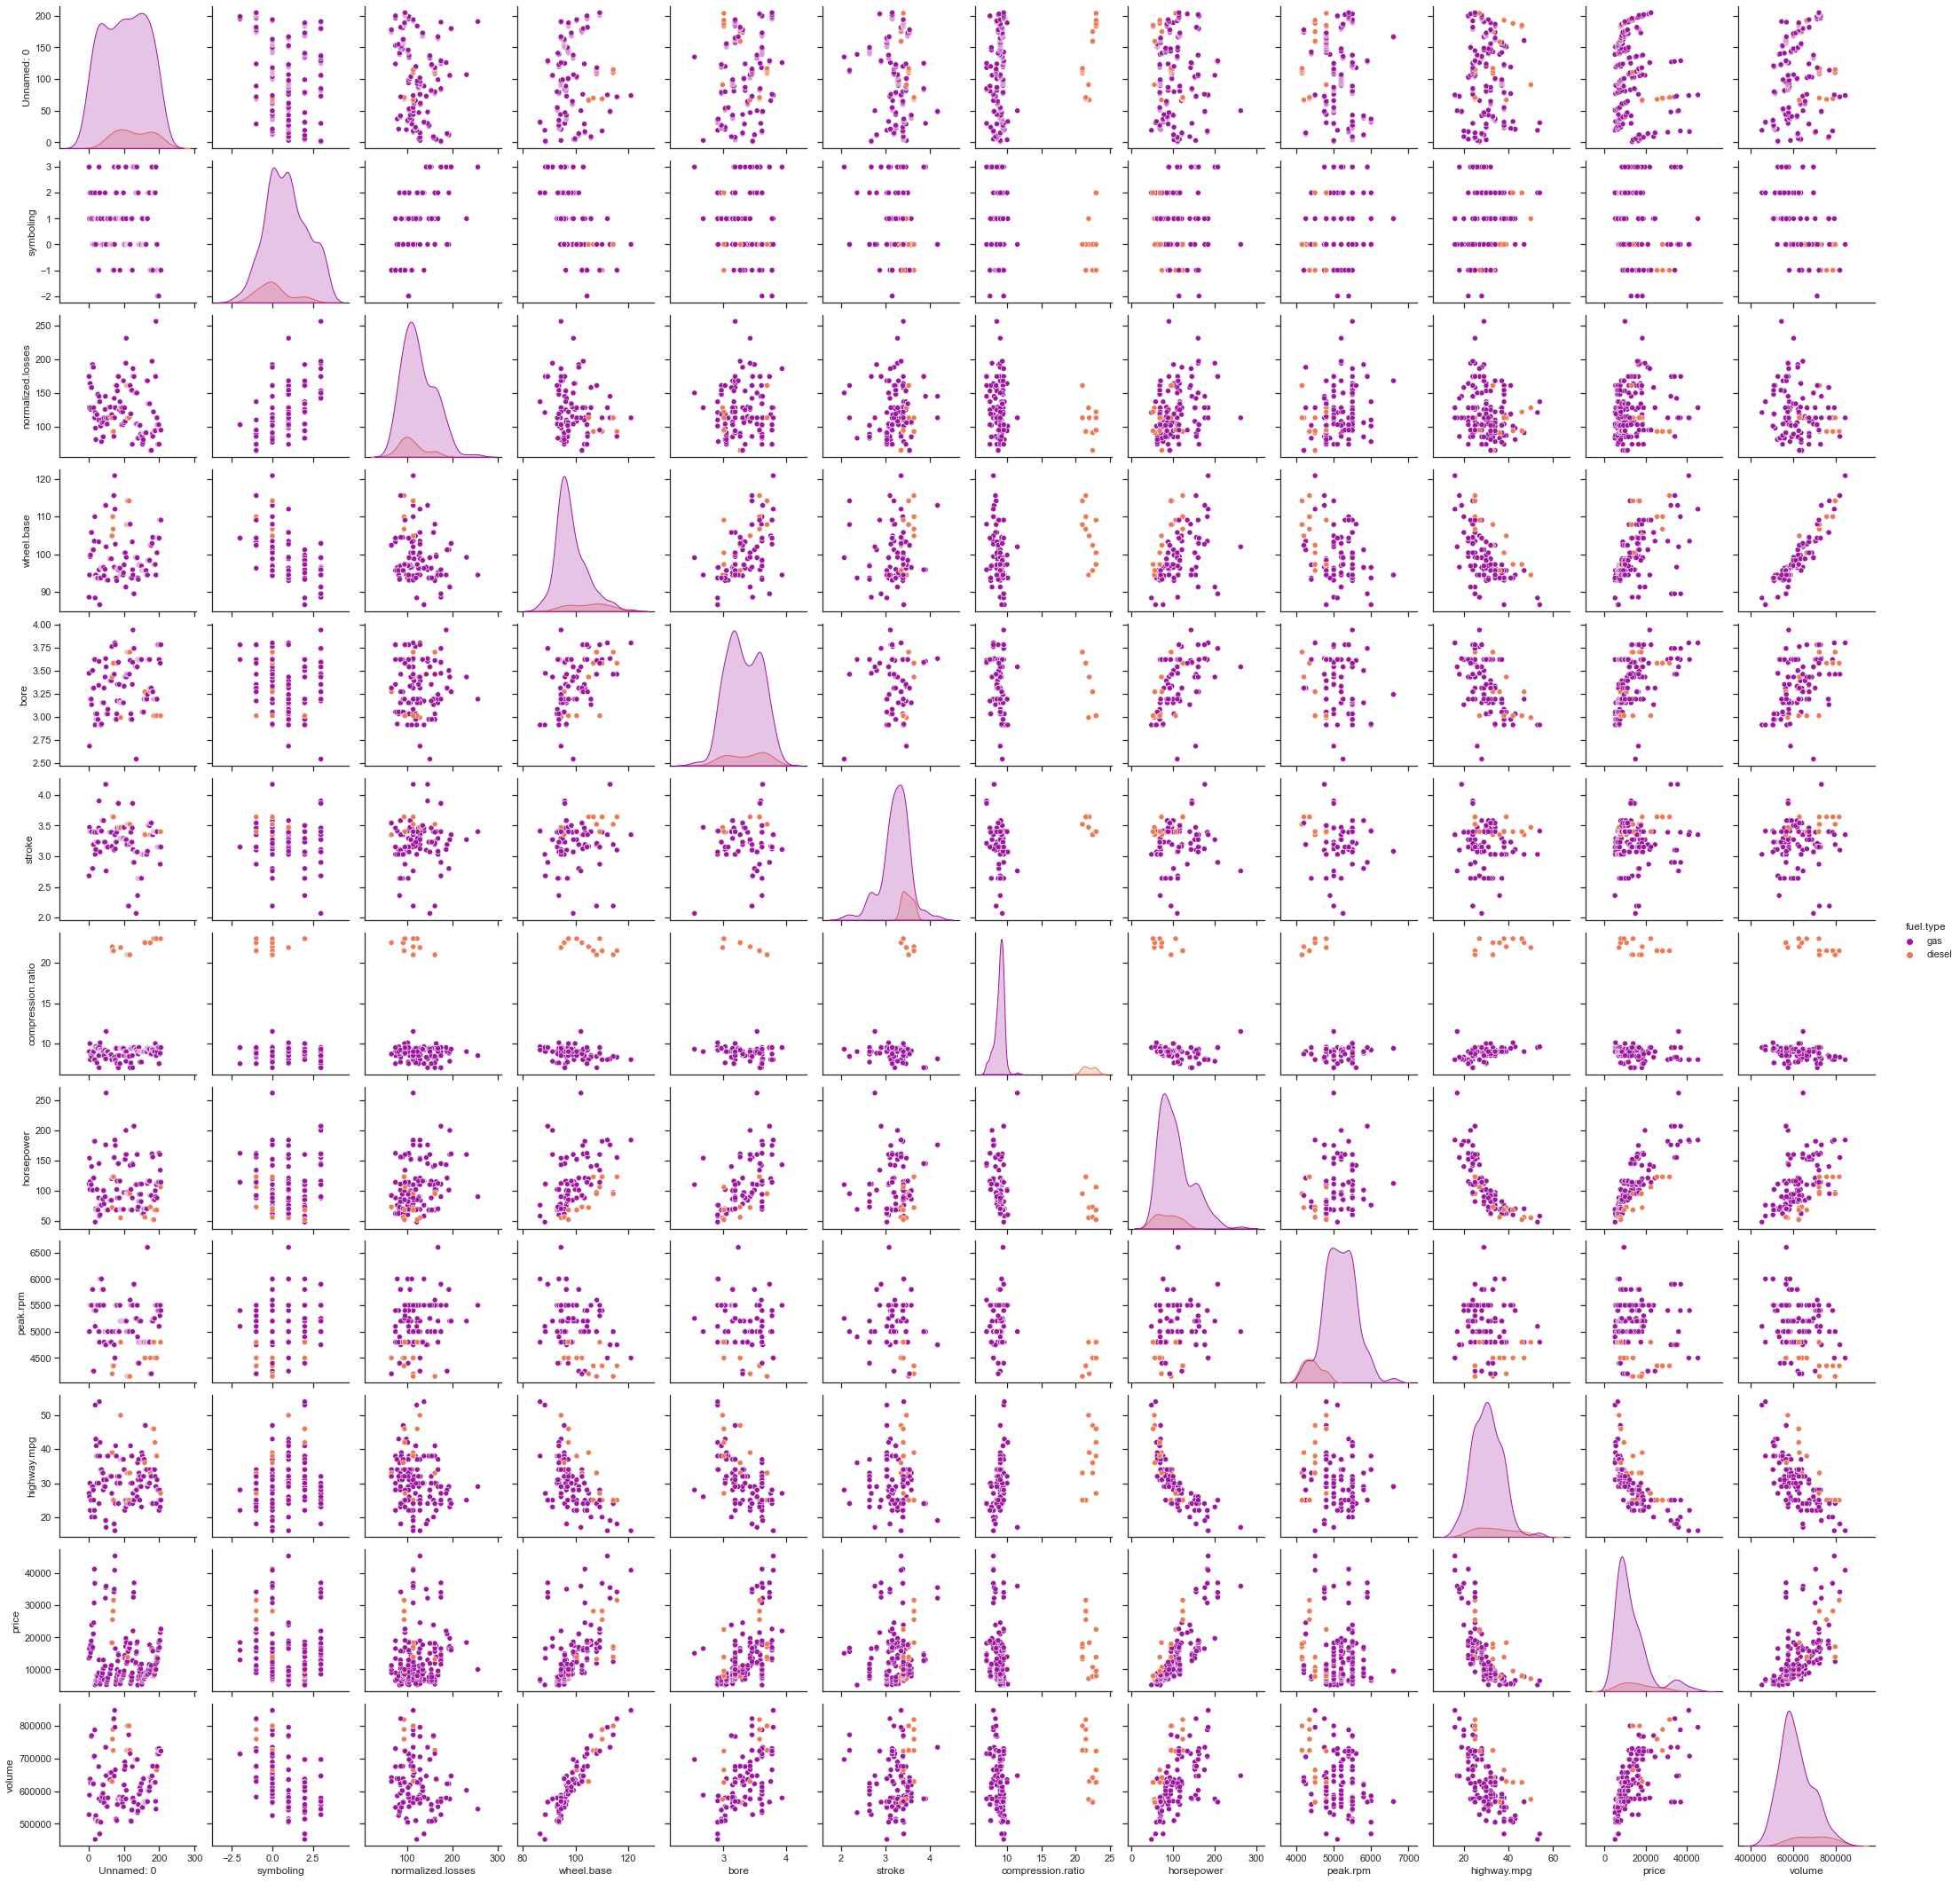

In [62]:
sns.pairplot(data, hue = 'fuel.type', palette = 'plasma')

C:\Users\daven\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


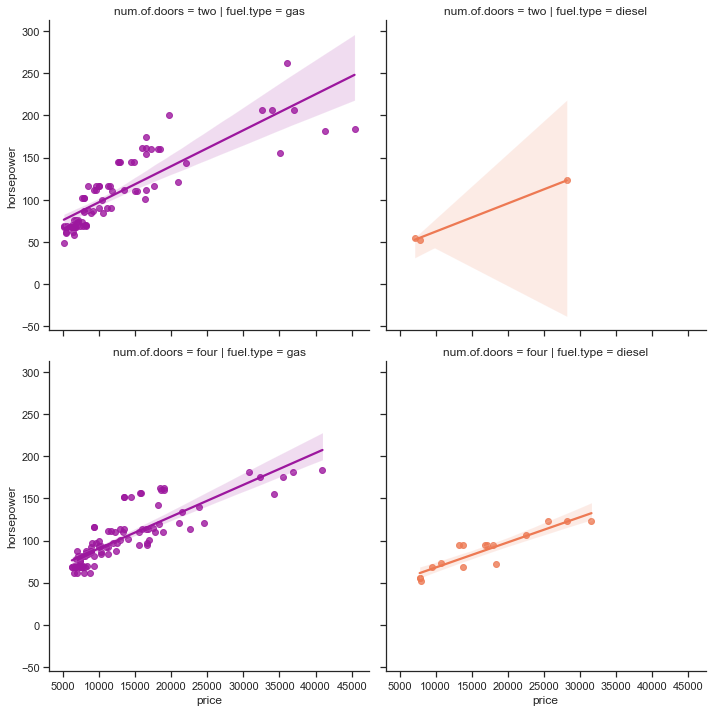

In [63]:
sns.lmplot('price', 'horsepower', data, 
           hue = 'fuel.type', col = 'fuel.type',  row = 'num.of.doors', 
           palette = 'plasma', 
           fit_reg = True);

In [64]:
# target and features
target = data.price

regressors = [x for x in data.columns if x not in ['price']]
features = data.loc[:, regressors]

num = ['symboling',  'volume', 'horsepower', 'wheel.base',
       'bore', 'stroke','compression.ratio', 'peak.rpm']

# scale the data
standard_scaler = StandardScaler()
features[num] = standard_scaler.fit_transform(features[num])

# glimpse
features.head()

,Unnamed: 0,symboling,normalized.losses,make,fuel.type,aspiration,num.of.doors,body.style,drive.wheels,engine.location,...,engine.type,num.of.cylinders,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,highway.mpg,volume
0,1,1.78685,174.384615,alfa-romero,gas,std,two,convertible,rwd,front,...,dohc,four,mpfi,0.513027,-1.808186,-0.288273,0.198569,-0.213359,27,-1.168294
1,2,1.78685,174.384615,alfa-romero,gas,std,two,convertible,rwd,front,...,dohc,four,mpfi,0.513027,-1.808186,-0.288273,0.198569,-0.213359,27,-1.168294
2,3,0.16397,128.152174,alfa-romero,gas,std,two,hatchback,rwd,front,...,ohcv,six,mpfi,-2.394827,0.702918,-0.288273,1.334283,-0.213359,26,-0.422041
3,4,0.97541,164.000000,audi,gas,std,four,sedan,fwd,front,...,ohc,four,mpfi,-0.517605,0.480415,-0.036204,-0.039139,0.856208,30,0.169527
4,5,0.97541,164.000000,audi,gas,std,four,sedan,4wd,front,...,ohc,five,mpfi,-0.517605,0.480415,-0.540341,0.304217,0.856208,22,0.193551


In [65]:
# categorical vars
classes = ['make', 'fuel.type', 'aspiration', 'num.of.doors', 
           'body.style', 'drive.wheels', 'engine.location',
           'engine.type', 'num.of.cylinders', 'fuel.system']

# create new dataset with only continios vars 
dummies = pd.get_dummies(features[classes])
features = features.join(dummies).drop(classes, 
                                       axis = 1)

# new dataset
print('In total:', features.shape)
features.head()

In total: (193, 66)


,Unnamed: 0,symboling,normalized.losses,wheel.base,bore,stroke,compression.ratio,horsepower,peak.rpm,highway.mpg,...,num.of.cylinders_six,num.of.cylinders_three,num.of.cylinders_twelve,fuel.system_1bbl,fuel.system_2bbl,fuel.system_idi,fuel.system_mfi,fuel.system_mpfi,fuel.system_spdi,fuel.system_spfi
0,1,1.78685,174.384615,-1.682379,0.513027,-1.808186,-0.288273,0.198569,-0.213359,27,...,0,0,0,0,0,0,0,1,0,0
1,2,1.78685,174.384615,-1.682379,0.513027,-1.808186,-0.288273,0.198569,-0.213359,27,...,0,0,0,0,0,0,0,1,0,0
2,3,0.16397,128.152174,-0.720911,-2.394827,0.702918,-0.288273,1.334283,-0.213359,26,...,1,0,0,0,0,0,0,1,0,0
3,4,0.97541,164.000000,0.142781,-0.517605,0.480415,-0.036204,-0.039139,0.856208,30,...,0,0,0,0,0,0,0,1,0,0
4,5,0.97541,164.000000,0.077596,-0.517605,0.480415,-0.540341,0.304217,0.856208,22,...,0,0,0,0,0,0,0,1,0,0


In [66]:
# split the data into train/test set
X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                                    test_size = 0.3,
                                                    random_state = seed)
print("Train", X_train.shape, "and test", X_test.shape)

Train (135, 66) and test (58, 66)


In [67]:
from sklearn.model_selection import GridSearchCV

C:\Users\daven\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.016e+06, tolerance: 1.044e+06
  model = cd_fast.enet_coordinate_descent(


CV results: 0.8443574418703762 207.5966803316705


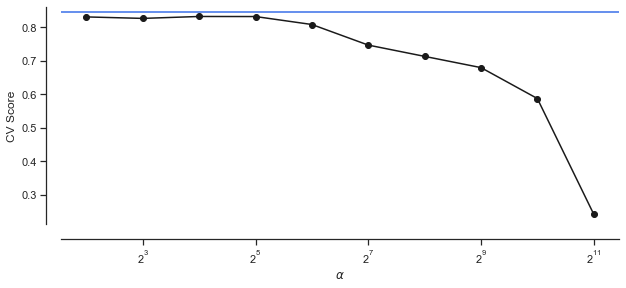

In [69]:
# logarithmic scale: log base 2
# high values to zero-out more variables
alphas = 2. ** np.arange(2, 12)
scores = np.empty_like(alphas)

for i, a in enumerate(alphas):
    lasso = Lasso(random_state = seed)
    lasso.set_params(alpha = a)
    lasso.fit(X_train, y_train)
    scores[i] = lasso.score(X_test, y_test)
    
lassocv = LassoCV(cv = 10, random_state = seed)
lassocv.fit(features, target)
lassocv_score = lassocv.score(features, target)
lassocv_alpha = lassocv.alpha_

plt.figure(figsize = (10, 4))
plt.plot(alphas, scores, '-ko')
plt.axhline(lassocv_score, color = c)
plt.xlabel(r'$\alpha$')
plt.ylabel('CV Score')
plt.xscale('log', base = 2)
sns.despine(offset = 15)

print('CV results:', lassocv_score, lassocv_alpha)

In [70]:
def mosthighlycorrelated(mydataframe, numtoreport):
    # find the correlations
    cormatrix = mydataframe.corr()
    # set the correlations on the diagonal or lower triangle to zero,
    # so they will not be reported as the highest ones:
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
    # find the top n correlations
    cormatrix = cormatrix.stack()
    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
    # assign human-friendly names
    cormatrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]
    return cormatrix.head(numtoreport)

mosthighlycorrelated(data, 10)

,FirstVariable,SecondVariable,Correlation
0,wheel.base,volume,0.917960
1,horsepower,price,0.812453
2,horsepower,highway.mpg,-0.812078
3,highway.mpg,price,-0.719178
4,highway.mpg,volume,-0.641540
5,price,volume,0.636314
6,bore,highway.mpg,-0.608804
7,symboling,normalized.losses,0.593658
8,wheel.base,price,0.584951
9,bore,horsepower,0.572972


Lasso picked 13 features and eliminated the other 53 features.


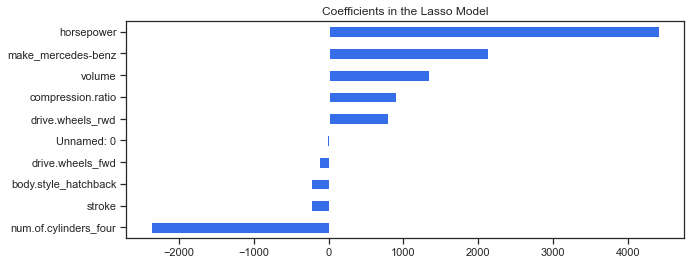

In [71]:
# lassocv coefficients
coefs = pd.Series(lassocv.coef_, index = features.columns)

# prints out the number of picked/eliminated features
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features.")

# takes first and last 10
coefs = pd.concat([coefs.sort_values().head(5), coefs.sort_values().tail(5)])

plt.figure(figsize = (10, 4))
coefs.plot(kind = "barh", color = c)
plt.title("Coefficients in the Lasso Model")
plt.show()

In [72]:
model_l1 = LassoCV(alphas = alphas, cv = 10, random_state = seed).fit(X_train, y_train)
y_pred_l1 = model_l1.predict(X_test)

model_l1.score(X_test, y_test)

0.8314505907151726

<AxesSubplot:xlabel='preds', ylabel='residuals'>

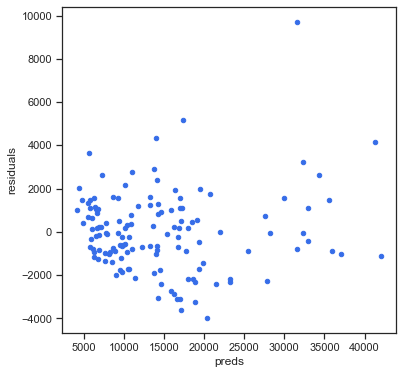

In [73]:
# residual plot
plt.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds": model_l1.predict(X_train), "true": y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals", kind = "scatter", color = c)

In [74]:
def MSE(y_true,y_pred):
    mse = mean_squared_error(y_true, y_pred)
    print('MSE: %2.3f' % mse)
    return mse

def R2(y_true,y_pred):    
    r2 = r2_score(y_true, y_pred)
    print('R2: %2.3f' % r2)     
    return r2

MSE(y_test, y_pred_l1); R2(y_test, y_pred_l1);

MSE: 3908196.667
R2: 0.831


In [75]:
# predictions
d = {'true' : list(y_test),
     'predicted' : pd.Series(y_pred_l1)
    }

pd.DataFrame(d).head()


,true,predicted
0,8499.0,8656.032067
1,17450.0,17165.382124
2,9279.0,11067.961127
3,7975.0,9690.475151
4,6692.0,6454.875134


In [76]:
# predictions
d = {'true' : list(y_test),
     'predicted' : pd.Series(y_pred_l1)
    }

pd.DataFrame(d).head()

,true,predicted
0,8499.0,8656.032067
1,17450.0,17165.382124
2,9279.0,11067.961127
3,7975.0,9690.475151
4,6692.0,6454.875134


In [77]:
# with best parameters for 1000 estimators
rfr = RandomForestRegressor(max_features = 0.1, max_depth = 9, 
                            n_estimators = 1000, random_state = seed)

score_train = cross_val_score(rfr, X_train, y_train, cv = 5).mean()
score_test = cross_val_score(rfr, X_test, y_test, cv = 5).mean()

print("Score with the train set = %.2f" % score_train)

Score with the train set = 0.87


In [79]:
model_rf = rfr.fit(X_train, y_train)

# predictions
y_pred_rf = model_rf.predict(X_test)

d = {'true' : list(y_test),
     'predicted' : pd.Series(y_pred_rf)
    }

pd.DataFrame(d).head()

,true,predicted
0,8499.0,8725.283846
1,17450.0,17515.932111
2,9279.0,10347.803152
3,7975.0,9609.235600
4,6692.0,7233.262287


<AxesSubplot:xlabel='preds', ylabel='residuals'>

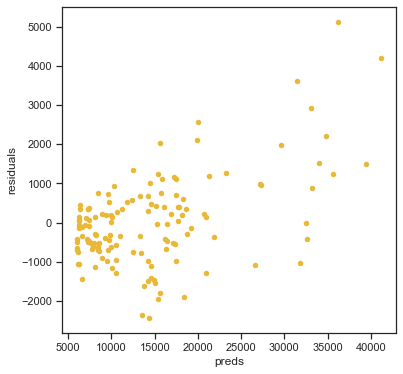

In [80]:
# residual plot
plt.rcParams['figure.figsize'] = (6.0, 6.0)

preds_rf= pd.DataFrame({"preds": model_rf.predict(X_train), "true": y_train})
preds_rf["residuals"] = preds_rf["true"] - preds_rf["preds"]
preds_rf.plot(x = "preds", y = "residuals", kind = "scatter", color = c2)

In [81]:
MSE(y_test, y_pred_rf); R2(y_test, y_pred_rf);

MSE: 3094364.834
R2: 0.867


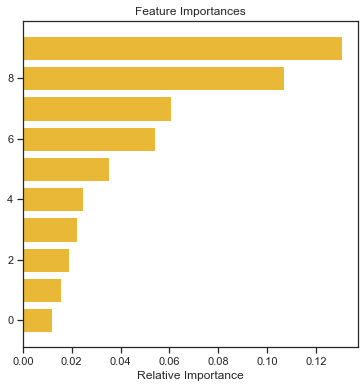

In [84]:
# first ten importances 
importances = model_rf.feature_importances_[:10]
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = c2, align = 'center')
plt.xlabel('Relative Importance')
plt.show()